# Drowsiness Detection OpenCV


This code can detect your eyes and alert when the user is drowsy.

## Applications
This can be used by riders who tend to drive for a longer period of time that may lead to accidents.

### Algorithm

Each eye is represented by 6 (x, y)-coordinates, starting at the left-corner of the eye (as if you were looking at the person), and then working clockwise around the eye:.

<img src="eye1.jpg">

### Condition

It checks 20 consecutive frames and if the Eye Aspect ratio is lesst than 0.25, Alert is generated.

#### Relationship

<img src="eye2.png">

#### Summing up

<img src="eye3.jpg">

jupyter kernel by Manuel Romero (mrm8488@gmail.com or @mrm8488)

In [1]:
from scipy.spatial import distance
from imutils import face_utils
import imutils
import dlib
import cv2

In [2]:
!pip install imutils

In [3]:
def eye_aspect_ratio(eye):
	A = distance.euclidean(eye[1], eye[5])
	B = distance.euclidean(eye[2], eye[4])
	C = distance.euclidean(eye[0], eye[3])
	ear = (A + B) / (2.0 * C)
	return ear

In [6]:
thresh = 0.25
frame_check = 20
detect = dlib.get_frontal_face_detector()
predict = dlib.shape_predictor("/content/drive/MyDrive/project/shape_predictor_68_face_landmarks.dat")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [9]:
import imutils


In [10]:
thresh = 0.25


In [12]:
import cv2
import imutils
from imutils import face_utils

# Define facial landmarks indices
lStart, lEnd = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
rStart, rEnd = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

# Define other constants
thresh = 0.25
frame_check = 20

# Function definitions (detect, predict, eye_aspect_ratio, etc.) are assumed to be implemented elsewhere in your code.

# Video capture
cap = cv2.VideoCapture(0)
flag = 0

while True:
    ret, frame = cap.read()

    # Check if the frame is successfully captured
    if not ret:
        print("Error: Failed to capture frame")
        break

    frame = imutils.resize(frame, width=400)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces and facial landmarks
    subjects = detect(gray, 0)

    for subject in subjects:
        shape = predict(gray, subject)
        shape = face_utils.shape_to_np(shape)
        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
        ear = (leftEAR + rightEAR) / 2.0
        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

        if ear < thresh:
            flag += 1
            if flag >= frame_check:
                cv2.putText(frame, "****************ALERT!****************", (10, 30),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                cv2.putText(frame, "****************ALERT!****************", (10, 325),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        else:
            flag = 0

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        cv2.destroyAllWindows()
        cap.release()
        break


Error: Failed to capture frame


In [16]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


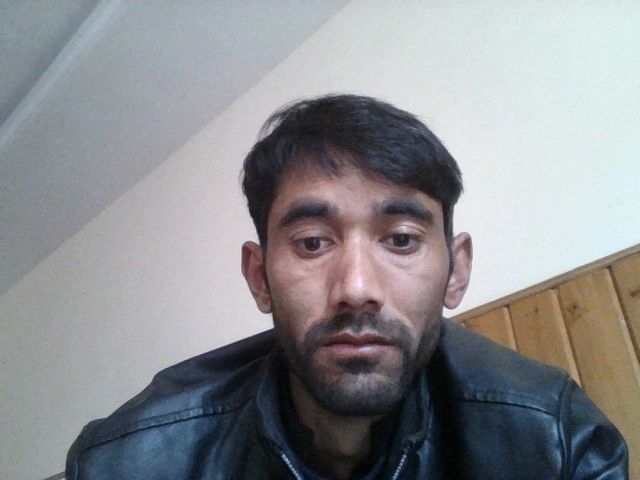

In [17]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))